# Projet GGVIE : détection de moments clés d'une entreprise

In [69]:
import pandas as pd
import numpy as np

In [2]:
df_stock_unite_legale_hist = pd.read_csv("..\StockUniteLegaleHistorique_utf8\StockUniteLegaleHistorique_utf8.csv",chunksize=1000000, low_memory=False)
df_stock_unite_legale_hist = pd.DataFrame(df_stock_unite_legale_hist.get_chunk(1000000))

In [41]:
df = df_stock_unite_legale_hist.copy()
df

,siren,dateFin,dateDebut,etatAdministratifUniteLegale,changementEtatAdministratifUniteLegale,nomUniteLegale,changementNomUniteLegale,nomUsageUniteLegale,changementNomUsageUniteLegale,denominationUniteLegale,...,nomenclatureActivitePrincipaleUniteLegale,changementActivitePrincipaleUniteLegale,nicSiegeUniteLegale,changementNicSiegeUniteLegale,economieSocialeSolidaireUniteLegale,changementEconomieSocialeSolidaireUniteLegale,societeMissionUniteLegale,changementSocieteMissionUniteLegale,caractereEmployeurUniteLegale,changementCaractereEmployeurUniteLegale
0,325175,NaN,2018-02-07,A,False,JANOYER,False,NaN,False,NaN,...,NAFRev2,False,65.0,True,NaN,False,NaN,False,N,False
1,325175,2018-02-06,2014-01-07,A,False,JANOYER,False,NaN,False,NaN,...,NAFRev2,False,57.0,True,NaN,False,NaN,False,N,False
2,325175,2014-01-06,2011-10-21,A,False,JANOYER,False,NaN,False,NaN,...,NAFRev2,False,40.0,True,NaN,False,NaN,False,N,False
3,325175,2011-10-20,2009-05-27,A,False,JANOYER,False,NaN,False,NaN,...,NAFRev2,False,32.0,True,NaN,False,NaN,False,N,False
4,325175,2009-05-26,2008-01-01,A,False,JANOYER,False,NaN,False,NaN,...,NAFRev2,True,16.0,False,NaN,False,NaN,False,N,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,266301829,1987-12-31,1983-12-25,A,False,NaN,False,NaN,False,BUREAU D AIDE SOCIALE DE EGLISOLLES,...,NAF1993,True,13.0,False,NaN,False,NaN,False,N,False
999996,266301829,1983-12-24,1983-03-01,A,False,NaN,False,NaN,False,BUREAU D AIDE SOCIALE DE EGLISOLLES,...,NaN,False,13.0,False,NaN,False,NaN,False,N,True
999997,266301829,1983-02-28,1982-01-01,A,True,NaN,False,NaN,False,BUREAU D AIDE SOCIALE DE EGLISOLLES,...,NaN,False,13.0,True,NaN,False,NaN,False,NaN,False
999998,266301829,1981-12-31,1900-01-01,NaN,False,NaN,False,NaN,False,BUREAU D AIDE SOCIALE DE EGLISOLLES,...,NaN,False,NaN,False,NaN,False,NaN,False,NaN,False


# Présentation de la donnée

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column                                         Non-Null Count    Dtype  
---  ------                                         --------------    -----  
 0   siren                                          1000000 non-null  int64  
 1   dateFin                                        695433 non-null   object 
 2   dateDebut                                      991928 non-null   object 
 3   etatAdministratifUniteLegale                   917587 non-null   object 
 4   changementEtatAdministratifUniteLegale         1000000 non-null  bool   
 5   nomUniteLegale                                 104821 non-null   object 
 6   changementNomUniteLegale                       1000000 non-null  bool   
 7   nomUsageUniteLegale                            15422 non-null    object 
 8   changementNomUsageUniteLegale                  1000000 non-null  bool   
 9   denominationUniteLegale  

In [5]:
df.describe()

,siren,categorieJuridiqueUniteLegale,nicSiegeUniteLegale
count,1.000000e+06,926683.00000,920540.00000
mean,1.625794e+08,6839.40670,18.08020
std,9.302659e+07,2298.11234,44.40033
min,3.251750e+05,1000.00000,8.00000
25%,4.721057e+07,7210.00000,12.00000
50%,2.113008e+08,7353.00000,15.00000
75%,2.522034e+08,7362.00000,18.00000
max,2.663018e+08,9900.00000,11202.00000


# Preprocessing

## Colonnes à supprimer

In [6]:
missing_rate = df.isnull().sum()/df.shape[0]
missing_rate.sort_values(ascending=False)

denominationUsuelle3UniteLegale                  0.999992
denominationUsuelle2UniteLegale                  0.999970
societeMissionUniteLegale                        0.986882
denominationUsuelle1UniteLegale                  0.985340
nomUsageUniteLegale                              0.984578
economieSocialeSolidaireUniteLegale              0.955967
nomUniteLegale                                   0.895179
dateFin                                          0.304567
nomenclatureActivitePrincipaleUniteLegale        0.280488
activitePrincipaleUniteLegale                    0.280488
caractereEmployeurUniteLegale                    0.177655
denominationUniteLegale                          0.112145
etatAdministratifUniteLegale                     0.082413
nicSiegeUniteLegale                              0.079460
categorieJuridiqueUniteLegale                    0.073317
dateDebut                                        0.008072
siren                                            0.000000
changementEcon

On choisit de supprimer les colonnes avec plus de 50% de valeurs manquantes (et les colonnes "changements" qui sont liés ?).

In [42]:
df = df.drop(["denominationUsuelle3UniteLegale","denominationUsuelle2UniteLegale","societeMissionUniteLegale", "denominationUsuelle1UniteLegale", "nomUsageUniteLegale", "economieSocialeSolidaireUniteLegale", "nomUniteLegale"], axis=1)

## Lignes à supprimer

In [43]:
df = df.dropna(subset = ['categorieJuridiqueUniteLegale', 'nicSiegeUniteLegale', "nomenclatureActivitePrincipaleUniteLegale", "dateDebut"])

## Remplacement des valeurs manquantes

In [44]:
from datetime import date

In [45]:
today = date.today()
today.strftime("%Y-%m-%d")

'2023-02-12'

In [46]:
df["dateFin"] = df["dateFin"].fillna(today.strftime("%Y-%m-%d"))

Nous pouvons mettre des dénominations à "null" : https://www.sirene.fr/sirene/public/variable/denominationUniteLegale

In [47]:
df["denominationUniteLegale"] = df["denominationUniteLegale"].fillna("null")

In [48]:
df["caractereEmployeurUniteLegale"] = df["caractereEmployeurUniteLegale"].fillna("NR") #NR = non renseigné

In [49]:
df["etatAdministratifUniteLegale"] = df["etatAdministratifUniteLegale"].fillna("null")

In [50]:
df.isnull().sum()

siren                                            0
dateFin                                          0
dateDebut                                        0
etatAdministratifUniteLegale                     0
changementEtatAdministratifUniteLegale           0
changementNomUniteLegale                         0
changementNomUsageUniteLegale                    0
denominationUniteLegale                          0
changementDenominationUniteLegale                0
changementDenominationUsuelleUniteLegale         0
categorieJuridiqueUniteLegale                    0
changementCategorieJuridiqueUniteLegale          0
activitePrincipaleUniteLegale                    0
nomenclatureActivitePrincipaleUniteLegale        0
changementActivitePrincipaleUniteLegale          0
nicSiegeUniteLegale                              0
changementNicSiegeUniteLegale                    0
changementEconomieSocialeSolidaireUniteLegale    0
changementSocieteMissionUniteLegale              0
caractereEmployeurUniteLegale  

## Transformation des variables de type object

### en datetime

In [51]:
df["dateDebut"] = pd.to_datetime(df["dateDebut"])
df["dateFin"] = pd.to_datetime(df["dateFin"])

In [52]:
df["duree"] = (df["dateFin"] - df["dateDebut"]).dt.days

### en catégorie d'entiers par encodage

In [54]:
from sklearn.preprocessing import LabelEncoder

Pour etatAdministratifUniteLegale, A => 0, C => 1 et null => 2

In [55]:
encoder_eaul = LabelEncoder()
df['etatAdministratifUniteLegale'] = encoder_eaul.fit_transform(df['etatAdministratifUniteLegale'])

Pour caractereEmployeurUniteLegale, N => 0, O => 1 et NR => 2

In [56]:
encoder_ceul = LabelEncoder()
df['caractereEmployeurUniteLegale'] = encoder_ceul.fit_transform(df['caractereEmployeurUniteLegale'])

In [57]:
encoder_dul = LabelEncoder()
df['denominationUniteLegale'] = encoder_dul.fit_transform(df['denominationUniteLegale'])
encoder_apul = LabelEncoder()
df['activitePrincipaleUniteLegale'] = encoder_apul.fit_transform(df['activitePrincipaleUniteLegale'])
encoder_napul = LabelEncoder()
df['nomenclatureActivitePrincipaleUniteLegale'] = encoder_napul.fit_transform(df['nomenclatureActivitePrincipaleUniteLegale'])

In [58]:
df['changementEtatAdministratifUniteLegale'] = df['changementEtatAdministratifUniteLegale'].replace({True: 1, False: 0})
df['changementNomUniteLegale'] = df['changementNomUniteLegale'].replace({True: 1, False: 0})
df['changementNomUsageUniteLegale'] = df['changementNomUsageUniteLegale'].replace({True: 1, False: 0})
df['changementDenominationUniteLegale'] = df['changementDenominationUniteLegale'].replace({True: 1, False: 0})
df['changementDenominationUsuelleUniteLegale'] = df['changementDenominationUsuelleUniteLegale'].replace({True: 1, False: 0})
df['changementCategorieJuridiqueUniteLegale'] = df['changementCategorieJuridiqueUniteLegale'].replace({True: 1, False: 0})
df['changementActivitePrincipaleUniteLegale'] = df['changementActivitePrincipaleUniteLegale'].replace({True: 1, False: 0})
df['changementNicSiegeUniteLegale'] = df['changementNicSiegeUniteLegale'].replace({True: 1, False: 0})
df['changementEconomieSocialeSolidaireUniteLegale'] = df['changementEconomieSocialeSolidaireUniteLegale'].replace({True: 1, False: 0})
df['changementSocieteMissionUniteLegale'] = df['changementSocieteMissionUniteLegale'].replace({True: 1, False: 0})
df['changementCaractereEmployeurUniteLegale'] = df['changementCaractereEmployeurUniteLegale'].replace({True: 1, False: 0})

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709443 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   siren                                          709443 non-null  int64         
 1   dateFin                                        709443 non-null  datetime64[ns]
 2   dateDebut                                      709443 non-null  datetime64[ns]
 3   etatAdministratifUniteLegale                   709443 non-null  int32         
 4   changementEtatAdministratifUniteLegale         709443 non-null  int64         
 5   changementNomUniteLegale                       709443 non-null  int64         
 6   changementNomUsageUniteLegale                  709443 non-null  int64         
 7   denominationUniteLegale                        709443 non-null  int32         
 8   changementDenominationUniteLegale           

## Data vizualisation

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_14592\901736822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

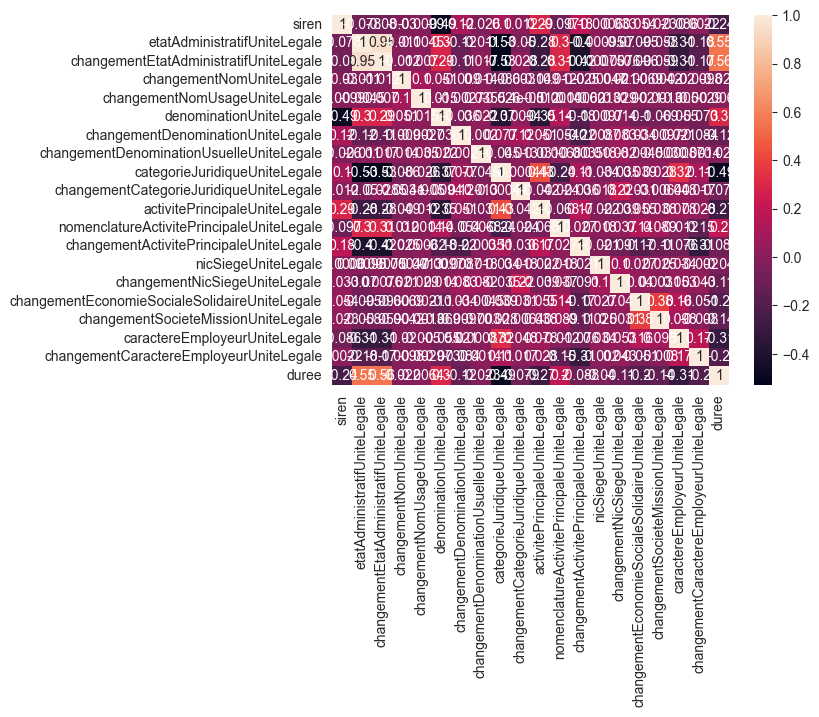

In [61]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: >

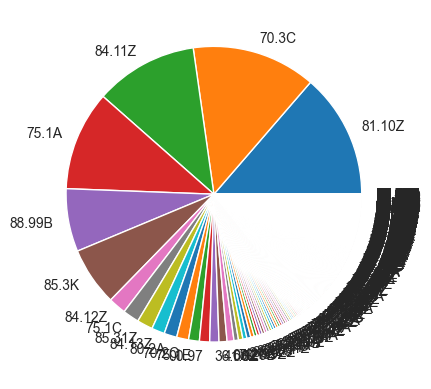

In [62]:
pd.Series(encoder_apul.inverse_transform(df["activitePrincipaleUniteLegale"])).value_counts(normalize=True).plot(kind='pie')

On peut voir que la majorité des entreprises sont liés aux bâtiments, dans l'administration d'immeubles résidentiels et dans l'administration publique.

## PCA

In [64]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA()
pca.fit(df.drop(["dateDebut", "dateFin"], axis=1))

PCA()

In [74]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[9.26696506e+15 4.42348611e+09 1.24742220e+07 3.44022352e+06
 7.32607311e+04 1.99708667e+03 1.06274184e+00 7.84566169e-01
 3.11240500e-01 1.30667274e-01 8.80093591e-02 4.47219714e-02
 2.49219195e-02 2.35986616e-02 1.16691486e-02 1.14541113e-02
 6.65547609e-03 1.13731235e-03 7.44061039e-04 1.04190931e-04]
[9.99999521e-01 4.77339017e-07 1.34609507e-09 3.71235010e-10
 7.90557594e-12 2.15505907e-13 1.14680624e-16 8.46626472e-17
 3.35860068e-17 1.41003242e-17 9.49710249e-18 4.82595431e-18
 2.68932789e-18 2.54653494e-18 1.25921949e-18 1.23601478e-18
 7.18193374e-19 1.22727538e-19 8.02917328e-20 1.12432582e-20]


In [76]:
df.drop(["dateDebut", "dateFin"], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709443 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   siren                                          709443 non-null  int64  
 1   etatAdministratifUniteLegale                   709443 non-null  int32  
 2   changementEtatAdministratifUniteLegale         709443 non-null  int64  
 3   changementNomUniteLegale                       709443 non-null  int64  
 4   changementNomUsageUniteLegale                  709443 non-null  int64  
 5   denominationUniteLegale                        709443 non-null  int32  
 6   changementDenominationUniteLegale              709443 non-null  int64  
 7   changementDenominationUsuelleUniteLegale       709443 non-null  int64  
 8   categorieJuridiqueUniteLegale                  709443 non-null  float64
 9   changementCategorieJuridiqueUniteLega

In [78]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(20)],
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,9.266965e+15,100.0,100.0
1,Dim2,4.423486e+09,0.0,100.0
2,Dim3,1.247422e+07,0.0,100.0
3,Dim4,3.440224e+06,0.0,100.0
4,Dim5,7.326073e+04,0.0,100.0
5,Dim6,1.997087e+03,0.0,100.0
6,Dim7,1.062742e+00,0.0,100.0
7,Dim8,7.845662e-01,0.0,100.0
8,Dim9,3.112405e-01,0.0,100.0
9,Dim10,1.306673e-01,0.0,100.0


In [81]:
n = df.drop(["dateDebut", "dateFin"], axis=1).shape[0] # nb individus
p = df.drop(["dateDebut", "dateFin"], axis=1).shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': df.drop(["dateDebut", "dateFin"], axis=1).columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,siren,-9.626500e+07,-25.718601
1,etatAdministratifUniteLegale,3.095383e-02,-0.116830
2,changementEtatAdministratifUniteLegale,3.133933e-02,-0.113752
3,changementNomUniteLegale,1.028406e-03,-0.001409
4,changementNomUsageUniteLegale,1.016983e-04,-0.000123
5,denominationUniteLegale,3.721774e+04,-66499.263722
6,changementDenominationUniteLegale,-2.913755e-02,-0.006056
7,changementDenominationUsuelleUniteLegale,7.101161e-04,-0.000299
8,categorieJuridiqueUniteLegale,-2.356456e+02,865.683251
9,changementCategorieJuridiqueUniteLegale,-1.303938e-03,-0.001935


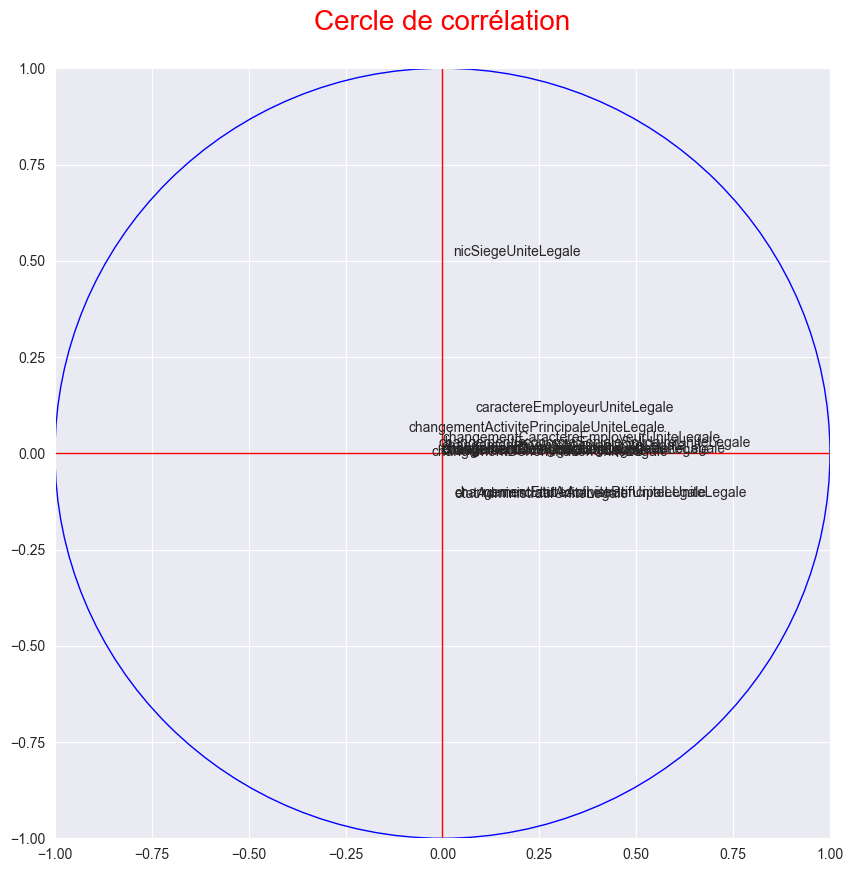

In [90]:
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

X = df.drop(["dateDebut", "dateFin"], axis=1)

for j in range(p):
   plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='red',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.title('Cercle de corrélation\n', fontsize=20, color='red')
plt.show()

On peut voir que la majorité des variables sont corrélées entre elles.

## Clustering

In [91]:
from sklearn.cluster import KMeans

In [102]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(df.drop(["dateDebut", "dateFin"], axis=1))

H:\Documents\ING3\Etude de cas\code\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


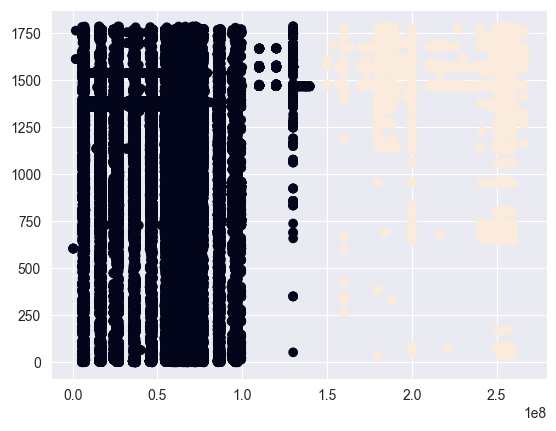

In [110]:
y_pred = kmeans.predict(df.drop(["dateDebut", "dateFin"], axis=1))
plt.scatter(df["siren"], df["activitePrincipaleUniteLegale"], c=y_pred)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709443 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   siren                                          709443 non-null  int64         
 1   dateFin                                        709443 non-null  datetime64[ns]
 2   dateDebut                                      709443 non-null  datetime64[ns]
 3   etatAdministratifUniteLegale                   709443 non-null  int32         
 4   changementEtatAdministratifUniteLegale         709443 non-null  int64         
 5   changementNomUniteLegale                       709443 non-null  int64         
 6   changementNomUsageUniteLegale                  709443 non-null  int64         
 7   denominationUniteLegale                        709443 non-null  int32         
 8   changementDenominationUniteLegale           

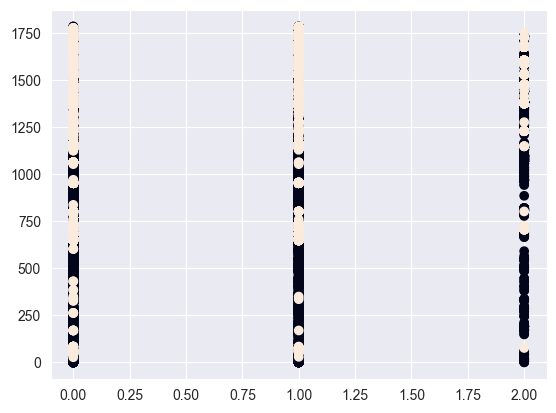

In [114]:
plt.scatter(df["etatAdministratifUniteLegale"], df["activitePrincipaleUniteLegale"], c=y_pred)

In [96]:
inertie = []
K_range = range(1,20)
for k in K_range:
    kmeans = KMeans(n_clusters=k,init = 'k-means++', n_init='auto').fit(df.drop(["dateDebut", "dateFin"], axis=1))
    inertie.append(kmeans.inertia_)

In [98]:
!pip install kneed

In [99]:
from kneed import KneeLocator

2
2


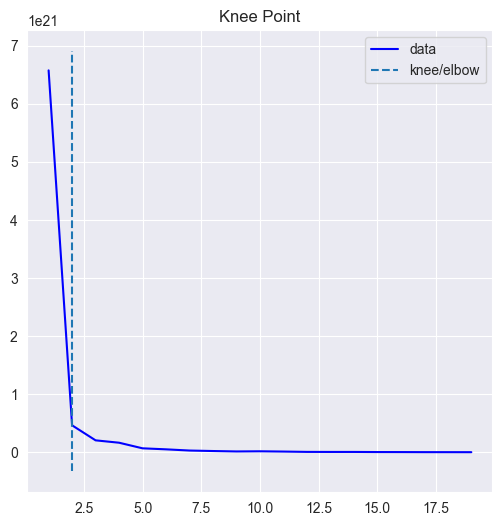

In [100]:
np.seterr(divide='ignore', invalid='ignore')#skip division by 0
kneedle = KneeLocator(K_range,inertie,curve="convex", direction="decreasing")
kneedle.plot_knee()
print(round(kneedle.knee, 1))
print(round(kneedle.elbow,1))

TODO : Clustering,

# Modèle de détection